In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_excel('Credit Card Customer Data.xlsx')

In [6]:
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [7]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<span style="color:darkblue">No null data </span> 

In [8]:
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [9]:
data.shape

(660, 7)

In [10]:
data.describe().T

count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%       75%       max  
Sl_No                  330.5    495.25     660.0  
Customer Key         53874.5  77202.50   99843.0  
Avg_Credit_Limit     18000.0  48000.00  200000.0  
Total_Credit_Cards       5.0      6.00      10.0  
Total_visits_bank        2.0      4.00       5.0  
Total_visits_online      2.0      4.00      15.0  
Total_calls_made         3.0      5.00      10.0

<span style="color:darkblue"> Avg_credit_limit ranges from 3000 to 200000, whereas other important features Total_Credit_Cards,Total_visits_bank, Total_visits_online and Total_calls_made range between ~ 0-15. This wide distribution can lead to biased results, hence the data needs scaling before analysis. 

##### Serial number and customer key are not useful for the clustering, hence it will be dropped

In [11]:
data_drop = data.drop(['Sl_No', 'Customer Key'], axis=1)

In [12]:
data_drop.shape

(660, 5)

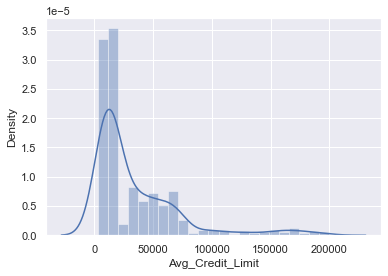

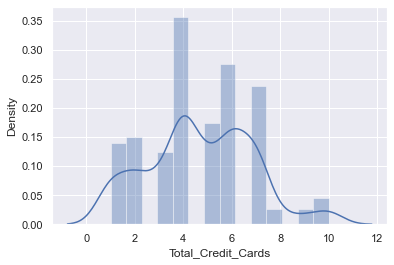

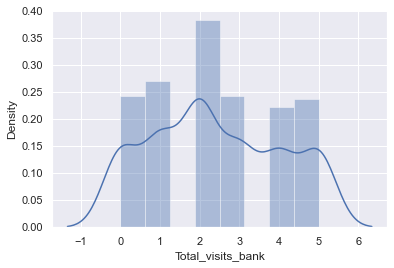

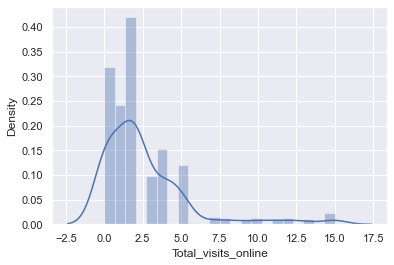

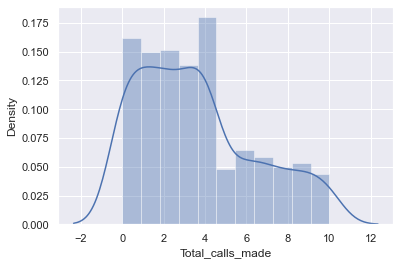

In [13]:
for i in data_drop.columns:
    sns.distplot (data_drop[i], kde = True)
    plt.show();

<span style="color:darkblue">By looking at the kde plot we can see frequency of peak values of each feature. The peaks in the kde plot shows the mode and based on that we can approximately guess the number of distinct clusters any particular feature forms.  

<span style="color:darkblue">Avg_Credit_Limit shows 3, Totat_Credit_Cards shows 4, Total_visits_bank show 3, Total_visits_online shows 3 and Total_call_made shows 2 peaks which indicates minimum number of probable separate clusters.

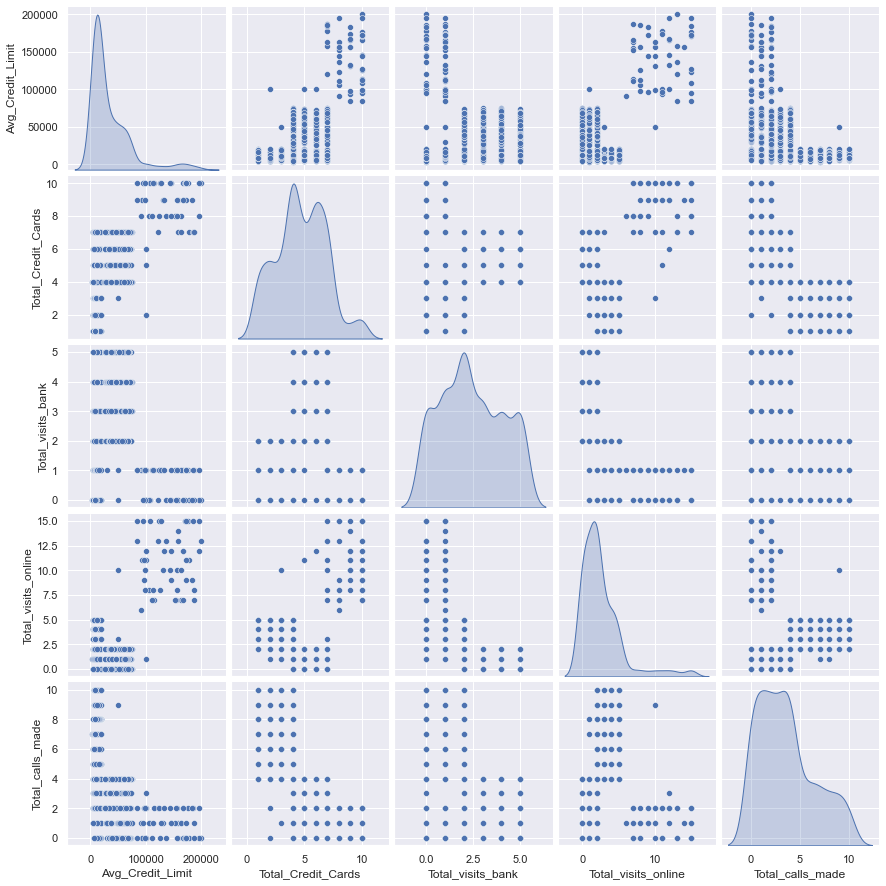

In [14]:
sns.pairplot(data_drop, diag_kind='kde');

<span style='color:darkblue'> Even though we see one or two points slightly far from the group of data, for example we see a point with 50000 Avg_Credit_Limit and Total_calls_made is 9, eventhough this point looks like an outlier, the values seem realistic and hence will not be removing any data. 

### Scaling

In [15]:
from scipy.stats import zscore
dataScaled= data_drop.apply(zscore)
dataScaled.shape

(660, 5)

In [16]:
dataScaled_2 = dataScaled.copy()

Making a clean copy of scaled dataframe

### K-means clustering

In [17]:
from sklearn.cluster import KMeans

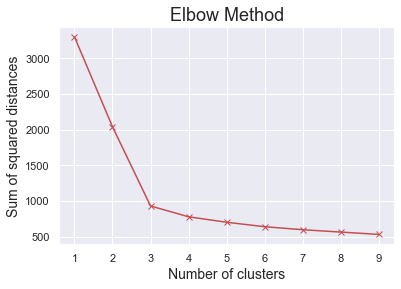

In [18]:
clusters=range(1,10)
SumOfSquaredDistances=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model_fit = model.fit(dataScaled)
    SumOfSquaredDistances.append(model_fit.inertia_)
    
plt.plot(clusters, SumOfSquaredDistances, 'rx-')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Sum of squared distances', fontsize=14)
plt.title('Elbow Method', fontsize=18)
plt.show()

<span style="color:darkblue"> The above Elbow method shows the inside cluster sum of squares for different number of clusters. We can see that for 3 clusters, most of the inertia is reduced and it further decreases very slowly. This indicates most optimum number of clusters for this data is 3.

In [19]:
kmeans = KMeans(n_clusters=3, random_state=12)
kmeans_fit = kmeans.fit(dataScaled)

data['labels_kmeans'] = kmeans_fit.labels_
data_drop['labels_kmeans'] = kmeans_fit.labels_
dataScaled['labels_kmeans'] = kmeans_fit.labels_
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  labels_kmeans  
0                  1                    1                 0              0  
1                  0                   10                 9              2  
2                  1                    3                 4              0  
3                  1                    1                 4              0  
4                  0                   12                 3              1

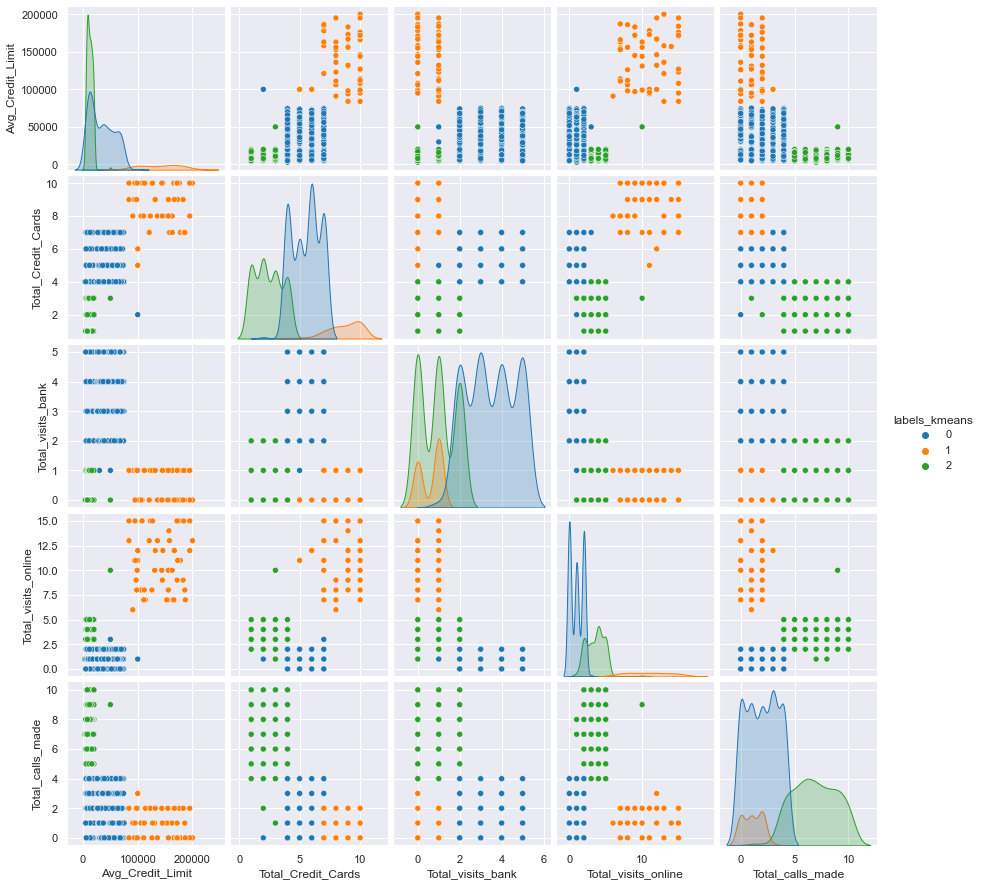

In [20]:
sns.pairplot(data_drop, hue='labels_kmeans', diag_kind='kde', palette='tab10');

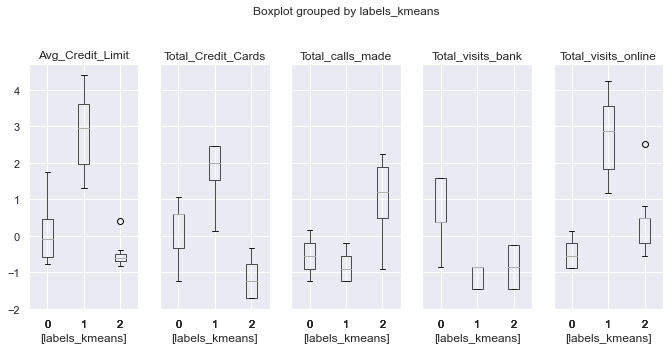

In [21]:
dataScaled.boxplot(by='labels_kmeans', layout=(2,5), figsize=(11,10), grid=True);

<span style = 'color:darkblue'> Each cluster is distinct from one another. There are some overlaps between clusters if we look at just one feature. For example in Avg_Credit_Limit the clusters 0 and 2 overlaps. However, if we look at two features at a time, we can see distinct separation between them as shown in the pairplots. For example: between  Avg_Credit_Limit and Total_visits_online we can clearly see separate clusters of green, blue and orange. 

In [24]:
#pip install plotly==4.14.3

<span style = 'color:Red'> Note: If plotly is not installed previously, you'll need to install them using the above command, then restart the Kernel and re-run all the above codes to get a 3D plot

In [22]:
import plotly.express as px

In [23]:
for i in ['Total_visits_bank','Total_visits_online', 'Total_calls_made' ]:
    fig = px.scatter_3d(dataScaled, x='Avg_Credit_Limit', y='Total_Credit_Cards', z= i,
              color='labels_kmeans')
    fig.show()

<span style = 'color:darkblue'>The 3-dimensional views shown above clearly shows separation of clusters when the total number of clusters are 3. The dark pink points form a separate cluster far from the other two, blue and yellow points are close to each other and also have some overlap.

### Hierarchical clustering

In [63]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

#### Plotting different dendograms for different linkage methods and choosing the best based on cophenetic coeff

In [65]:
Z_single = linkage(dataScaled_2, metric='euclidean', method='single')
c_single, coph_dists_single = cophenet(Z_single , pdist(dataScaled_2))
c_single

0.7391220243806552

In [66]:
Z_ward = linkage(dataScaled_2, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward , pdist(dataScaled_2))
c_ward

0.7415156284827493

In [67]:
Z_complete = linkage(dataScaled_2, metric='euclidean', method='complete')
c_complete, coph_dists_complete = cophenet(Z_complete , pdist(dataScaled_2))
c_complete

0.8599730607972423

In [68]:
Z_weighted = linkage(dataScaled_2, metric='euclidean', method='weighted')
c_weighted, coph_dists_weighted = cophenet(Z_weighted , pdist(dataScaled_2))
c_weighted

0.8861746814895477

In [69]:
Z_avg = linkage(dataScaled_2, metric='euclidean', method='average')
c_avg, coph_dists_avg = cophenet(Z_avg , pdist(dataScaled_2))
c_avg

0.8977080867389372

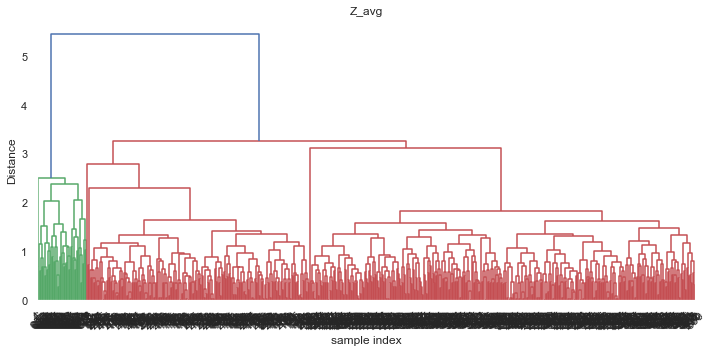

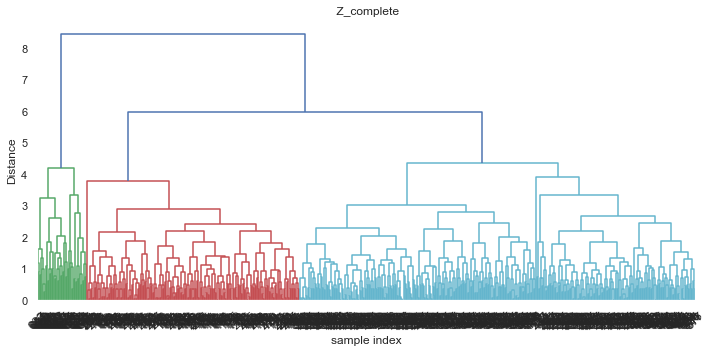

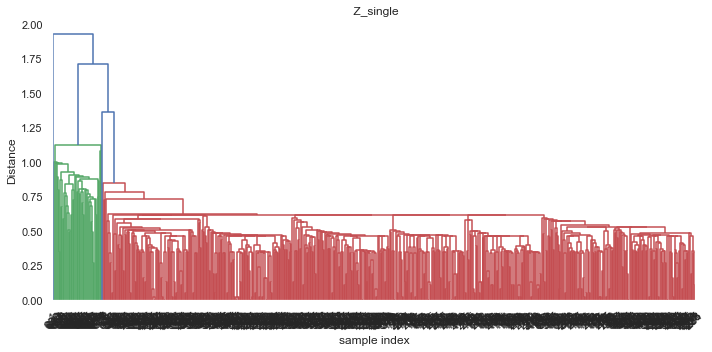

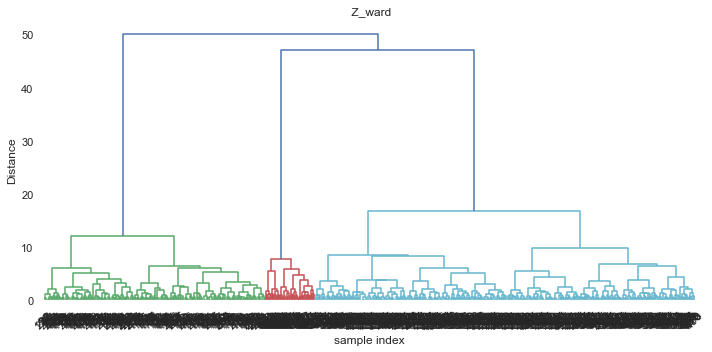

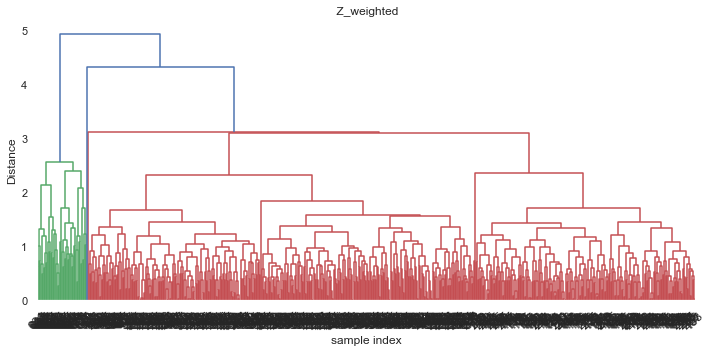

In [70]:
temp = ['Z_avg',' Z_complete',' Z_single',' Z_ward',' Z_weighted']
j=0
for i in [Z_avg, Z_complete, Z_single, Z_ward, Z_weighted]:
    
    plt.figure(figsize=(10, 5))
    plt.title(temp[j])
    j=j+1
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(i,  leaf_rotation=45 , leaf_font_size=12 )
    plt.tight_layout()

<span style='color:darkblue'> Most of the dendograms shows similar 3 big clusters except when linkage is single. To choose the best linkage, we have calculated the cophenetic correlations. Average linkage method seems to give the highest cophenetic correlation of ~0.9, indicating its the most faithful to the data.

In [71]:
hierarchy = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
hierarchy_fit = hierarchy.fit(dataScaled_2)

In [72]:
data['labels_hierarchy'] = hierarchy_fit.labels_
data_drop['labels_hierarchy'] = hierarchy_fit.labels_
dataScaled['labels_hierarchy'] = hierarchy_fit.labels_ 
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  labels_kmeans  \
0                  1                    1                 0              0   
1                  0                   10                 9              2   
2                  1                    3                 4              0   
3                  1                    1                 4              0   
4                  0                   12                 3              1   

   labels_hierarchy  
0                 0  
1                 2  
2                 0  
3                 0  
4                 1

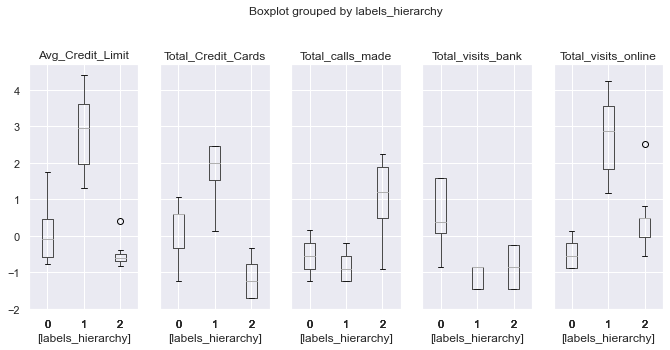

In [73]:
dataScaled.drop(['labels_kmeans'], axis=1).boxplot(by='labels_hierarchy', layout=(2,5), figsize=(11,10), grid=True);

<span style='color:darkblue'> The clusters formed using Hierarchy method is very similar to that of K-means clustering and we see distinct separation and some overlap in the 2D box-plot. 

### Silhouette Score for Hierarchy and K-means

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
print ('The Silhouette Score for Heirarchy method is: ', silhouette_score(dataScaled_2, hierarchy_fit.labels_))
print ('The Silhouette Score for K-means method is: ', silhouette_score(dataScaled_2, kmeans_fit.labels_))

The Silhouette Score for Heirarchy method is:  0.515922432650965
The Silhouette Score for K-means method is:  0.5157182558881063


<span style='color:darkblue'>The avg. score is greater than 0.5, which means the clustering is good. 

<span style='color:darkblue'>The score for both K-means and Heirarchy are almost the same suggesting both algorithms are equally good for the given data. 
    
<span style='color:purple'> Using K-means as an example, let us see if the Silhouette score increases with decreasing or increasing the number of clusters

### Silhouette plot on K-Means clustering

In [76]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [77]:
X = dataScaled_2.to_numpy()
X.shape

(660, 5)

For n_clusters = 2 The average silhouette_score is : 0.41842496663215445
For n_clusters = 3 The average silhouette_score is : 0.5157182558881063
For n_clusters = 4 The average silhouette_score is : 0.3556670619372605
For n_clusters = 5 The average silhouette_score is : 0.2717470361089752
For n_clusters = 6 The average silhouette_score is : 0.2558123746389958


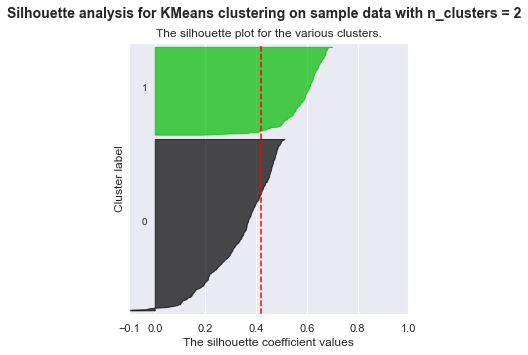

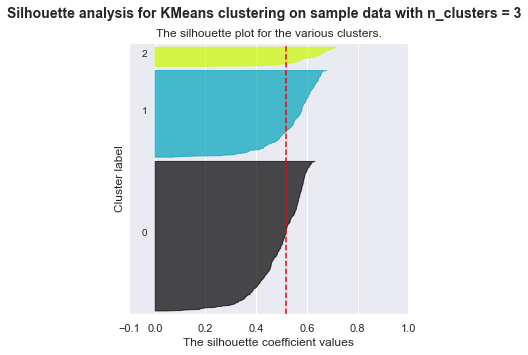

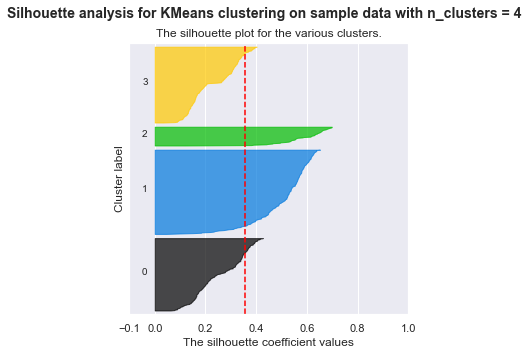

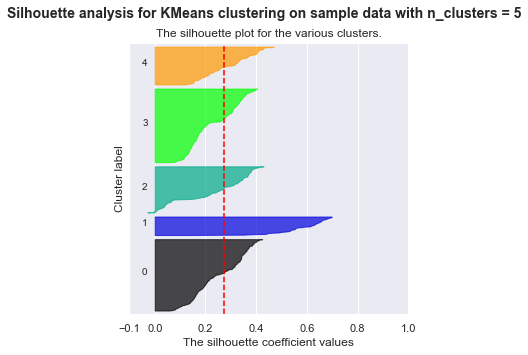

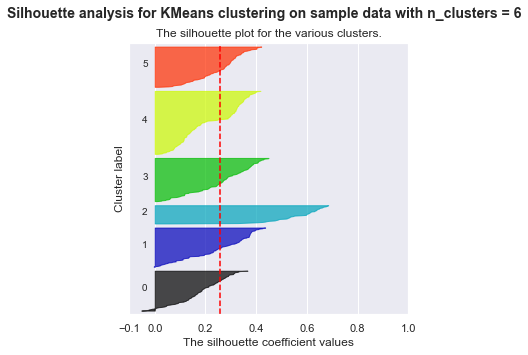

In [78]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(5, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
  
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<span style='color:darkblue'>We can see from the above plots that the silhouette score is maximum when the total number of clusters is 3. The score decreases when the clusters increase or decrease indicating that 3 is the optimum number. 
We can also see that some samples are having negative silhouette score when number of clusters = 2,5,6 signifying it is being assigned in a wrong cluster. 

#### Comparison between K-means and Hierarchical clustering

In [79]:
km = data_drop.drop(['labels_hierarchy'], axis=1).groupby(['labels_kmeans'])
km.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels_kmeans                                                            
0                  33782.383420            5.515544           3.489637   
1                 141040.000000            8.740000           0.600000   
2                  12174.107143            2.410714           0.933036   

               Total_visits_online  Total_calls_made  
labels_kmeans                                         
0                         0.981865          2.000000  
1                        10.900000          1.080000  
2                         3.553571          6.870536

In [80]:
hc = data_drop.drop(['labels_kmeans'], axis=1).groupby(['labels_hierarchy'])
hc.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels_hierarchy                                                            
0                     33713.178295            5.511628           3.485788   
1                    141040.000000            8.740000           0.600000   
2                     12197.309417            2.403587           0.928251   

                  Total_visits_online  Total_calls_made  
labels_hierarchy                                         
0                            0.984496          2.005168  
1                           10.900000          1.080000  
2                            3.560538          6.883408

<span style='color:darkblue'>By looking at the clusters in the box plot for both Kmeans and Hierarchy method along with silhouette scores for both, we can conclude that both algorithms have given very similar clustering output. 

<span style='color:darkblue'>This can be further verified by calculating the mean values of the clusters for different variables as shown in the above two tables. The mean values for clusters 0, 1 and 2 are almost the same. 


#### Key Questions:

<span style='color:red'>How many different segments of customers are there?\
<span style='color:red'>How are these segments different from each other?\
<span style='color:red'>What are your recommendations to the bank on how to better market to and service these customers?

<span style='color:darkblue'>There are mainly three separate segments of customers.

<span style='color:Green'> First are the customers with higher credit limit, larger number of credit cards and does most of the visits online.\
<span style='color:darkblue'> Second are the customers with lower credit limit, lower number of credit cards and they make the most phone calls. \
<span style='color:Purple'> Finally, the third group have credit limit and number of credit cards somewhere in the middle between the first and the second group and they mostly visit the bank in person. 
    
To target new customers, especially the first group, online marketing campaigns such as sending emails, contacting people who visit the website, LinkedIn posts etc will help. These people might already have high income and good credit limit, the best way to attract them is by giving higher credit limit credit cards. The second group of customers can be enhanced by reaching out to them through direct phone calls. Finally, by sending offers and information with regular mails, third group of customers can be captured more. 

To run personalized targets for existing customers, they need to start by increasing the credit limits or issuing new credit cards for groups 2 and 3. 
Based on this cluster analysis the Operations team can streamline their service delivery based on the group numbers any particular person fall into. 
For example: group 1 people mostly visit online and hence an online chat/email support for them. 
Group 2 mostly call and some also visit online, hence a phone support for them. 
Group 3 are the people who visit the bank in person, hence they can be greeted face to face for support. 

Gathering more information can also help in making these clusters even better. For example, adding 'Age group' to the current data might help in separating the clusters and understanding customers even better. The group 3 people mostly visit the bank, maybe they are old people who are not used to technology of online chatting and phone calls, hence they visit in person. 

Cluster analysis has helped in getting to know more about our customers can definitely help in increasing the customer base.  